# Basic steps

In [2]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])




array([1, 1, 0])

# Visualization

In [3]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



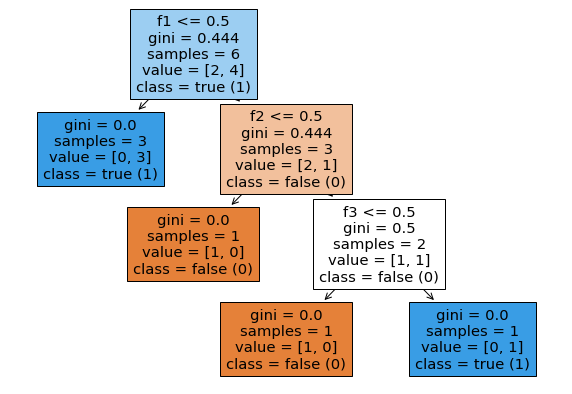

In [4]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


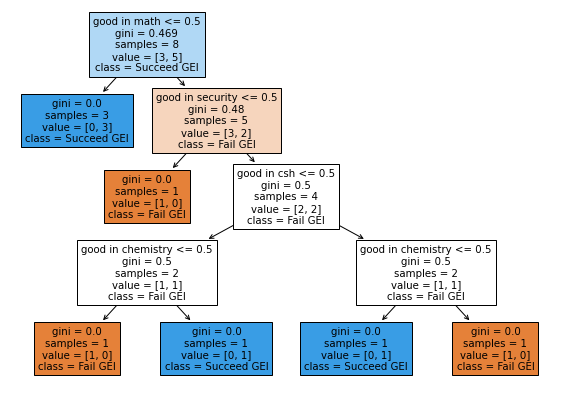

In [5]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [1, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0], [1, 1, 1, 1], [0, 0, 0, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1, 0, 1]

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X, Y)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf1, 
                   feature_names= ("good in math","good in security" , "good in chemistry", "good in csh"),
                   class_names= ("Fail GEI", "Succeed GEI"), 
                   filled=True)

## Compass dataset

There are 28 features in total

60.8k examples

Most likely important features : Ethnic, Date of birth, sex_code

To reduce the dataset, remove Person_ID, Assesment_ID, Case_ID, MiddleName... It's the values where everyone has the same or everyone has a unique.

Take 50% of the highest values and set them to 1 and the other 50% are set 0.


In [6]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

### The four return values for load_from_csv
train_examples is the training set

train_labels is the classes associated with the training set.

features are the facts the prediction are based on

prediction is what is predicted as true or false

### The three parameters for the constructor
splitter decides which strategy used to split at each node, best split or best random split.

max_depth is the maximum depth of the tree.

min_samples_split is the minimum number of samples in a potential leaf required to be accepted.

### Tasks : 6
To assess whether or not the algorith is fair to a particular ethnic group, we could create tuples of new cases where all of the features are the same except the ethnicity. Then if the algorithm predicts differents outcomes, we could establish that the algorithm is unfair towards a particular ethnic group.

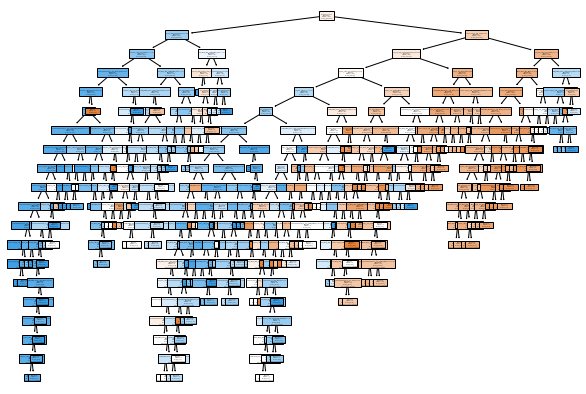

In [7]:
Compass_decision_tree = tree.DecisionTreeClassifier()
Compass_decision_tree1 = tree.DecisionTreeClassifier(max_depth = 3)
Compass_decision_tree2 = tree.DecisionTreeClassifier(min_samples_leaf = 4)
Compass_decision_tree3 = tree.DecisionTreeClassifier(splitter = "random")

# Decision tree1, with all parameters as default

Compass_decision_tree = Compass_decision_tree.fit(train_examples, train_labels)
Compass_decision_tree1 = Compass_decision_tree1.fit(train_examples, train_labels)
Compass_decision_tree2 = Compass_decision_tree2.fit(train_examples, train_labels)
Compass_decision_tree2 = Compass_decision_tree2.fit(train_examples, train_labels)

fig1 = plt.figure(figsize=(10,7))
_ = tree.plot_tree(Compass_decision_tree, 
                   feature_names= (features),
                   class_names= ("not " + prediction, prediction), 
                   filled=True)

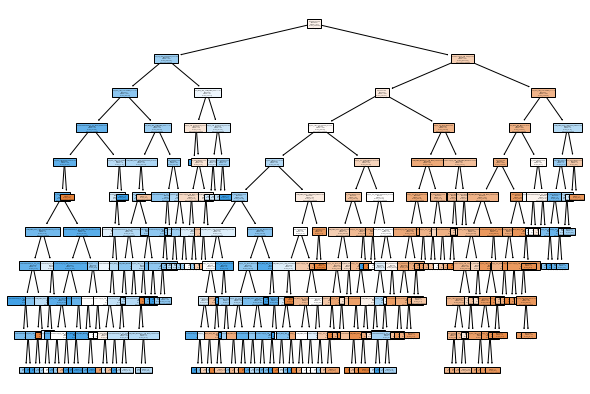

In [93]:
# Decision tree2, with max depth = 10
Compass_decision_tree2 = tree.DecisionTreeClassifier(max_depth = 10)
Compass_decision_tree2 = Compass_decision_tree2.fit(train_examples, train_labels)

fig1 = plt.figure(figsize=(10,7))
_ = tree.plot_tree(Compass_decision_tree2, 
                   feature_names= (features),
                   class_names= ("not " + prediction, prediction), 
                   filled=True)

plt.savefig("fig1.pdf")

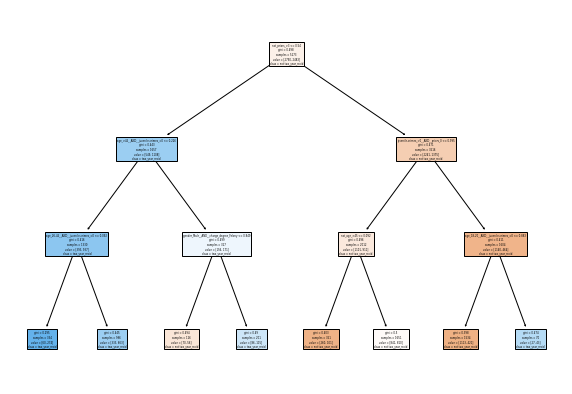

In [88]:
# Decision tree2, with max depth = 10


fig1 = plt.figure(figsize=(10,7))
_ = tree.plot_tree(Compass_decision_tree2, 
                   feature_names= (features),
                   class_names= ("not " + prediction, prediction), 
                   filled=True)

plt.savefig("fig2.pdf")

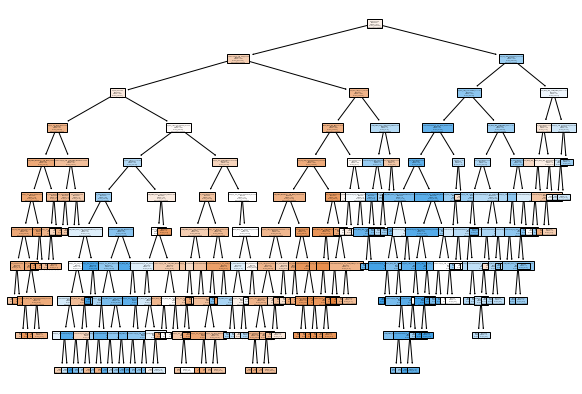

In [67]:
# Decision tree2, with max depth = 10
Compass_decision_tree2 = tree.DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 4)
Compass_decision_tree2 = Compass_decision_tree2.fit(train_examples, train_labels)

fig1 = plt.figure(figsize=(10,7))
_ = tree.plot_tree(Compass_decision_tree2, 
                   feature_names= (features),
                   class_names= ("not " + prediction, prediction), 
                   filled=True)

plt.savefig("fig3.pdf")

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_examples, 
                                                    train_labels,
                                                    test_size=0.2)

Compass_decision_tree3 = tree.DecisionTreeClassifier()
Compass_decision_tree3 = Compass_decision_tree3.fit(X_train, y_train)
predictions = Compass_decision_tree3.predict(X_test)
good_results = [1 if i==j else 0 for i, j in zip(predictions,y_test)]
print("Number of good predictions : ",good_results.count(1))
print("Number of bad predictions : ", good_results.count(0))


Number of good predictions :  674
Number of bad predictions :  381


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_examples, 
                                                    train_labels,
                                                    test_size=0.2)

Compass_decision_tree3 = tree.DecisionTreeClassifier(min_samples_leaf = 4)
Compass_decision_tree3 = Compass_decision_tree3.fit(X_train, y_train)
predictions = Compass_decision_tree3.predict(X_test)
good_results = [1 if i==j else 0 for i, j in zip(predictions,y_test)]
print("Number of good predictions : ",good_results.count(1))
print("Number of bad predictions : ", good_results.count(0))


Number of good predictions :  684
Number of bad predictions :  371


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_examples, 
                                                    train_labels,
                                                    test_size=0.2)

Compass_decision_tree3 = tree.DecisionTreeClassifier(splitter = "random")
Compass_decision_tree3 = Compass_decision_tree3.fit(X_train, y_train)
predictions = Compass_decision_tree3.predict(X_test)
good_results = [1 if i==j else 0 for i, j in zip(predictions,y_test)]
print("Number of good predictions : ",good_results.count(1))
print("Number of bad predictions : ", good_results.count(0))


Number of good predictions :  697
Number of bad predictions :  358


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_examples, 
                                                    train_labels,
                                                    test_size=0.2)

Compass_decision_tree3 = tree.DecisionTreeClassifier(max_depth = 10)
Compass_decision_tree3 = Compass_decision_tree3.fit(X_train, y_train)
predictions = Compass_decision_tree3.predict(X_test)
good_results = [1 if i==j else 0 for i, j in zip(predictions,y_test)]
print("Number of good predictions : ",good_results.count(1))
print("Number of bad predictions : ", good_results.count(0))


Number of good predictions :  698
Number of bad predictions :  357


In [83]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)

Compass_decision_tree3 = tree.DecisionTreeClassifier()
for train_index, test_index in cv.split(train_examples):
    Compass_decision_tree3 = Compass_decision_tree3.fit(train_examples[train_index], train_labels[train_index])
    predictions = Compass_decision_tree3.predict(train_examples[test_index])
    confusion_mat = confusion_matrix(train_labels[test_index], predictions)
    good_results = [1 if i==j else 0 for i, j in zip(predictions,train_labels[test_index])]
    print("Number of good predictions : ",good_results.count(1))
    print("Number of bad predictions : ", good_results.count(0))
    print("Accuracy : ", format(good_results.count(1)/(good_results.count(0)+good_results.count(1)), ".2f"))
    print("Confusion matrix :\n", confusion_mat)
    print()

Number of good predictions :  682
Number of bad predictions :  373
Accuracy :  0.65
Confusion matrix :
 [[414 134]
 [239 268]]

Number of good predictions :  697
Number of bad predictions :  358
Accuracy :  0.66
Confusion matrix :
 [[391 173]
 [185 306]]

Number of good predictions :  679
Number of bad predictions :  376
Accuracy :  0.64
Confusion matrix :
 [[397 160]
 [216 282]]

Number of good predictions :  689
Number of bad predictions :  365
Accuracy :  0.65
Confusion matrix :
 [[404 159]
 [206 285]]

Number of good predictions :  662
Number of bad predictions :  392
Accuracy :  0.63
Confusion matrix :
 [[403 155]
 [237 259]]



In [87]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)


for train_index, test_index in cv.split(train_examples):
    Compass_decision_tree3 = Compass_decision_tree3.fit(train_examples[train_index], train_labels[train_index])
    predictions = Compass_decision_tree3.predict(train_examples[test_index])
    confusion_mat = confusion_matrix(train_labels[test_index], predictions)
    good_results = [1 if i==j else 0 for i, j in zip(predictions,train_labels[test_index])]
    print("Number of good predictions : ",good_results.count(1))
    print("Number of bad predictions : ", good_results.count(0))
    print("Accuracy : ", format(good_results.count(1)/(good_results.count(0)+good_results.count(1)), ".2f"))
    print("Confusion matrix :\n", confusion_mat)
    print()

Number of good predictions :  663
Number of bad predictions :  392
Accuracy :  0.63
Confusion matrix :
 [[434 114]
 [278 229]]

Number of good predictions :  671
Number of bad predictions :  384
Accuracy :  0.64
Confusion matrix :
 [[400 164]
 [220 271]]

Number of good predictions :  669
Number of bad predictions :  386
Accuracy :  0.63
Confusion matrix :
 [[455 102]
 [284 214]]

Number of good predictions :  685
Number of bad predictions :  369
Accuracy :  0.65
Confusion matrix :
 [[466  97]
 [272 219]]

Number of good predictions :  671
Number of bad predictions :  383
Accuracy :  0.64
Confusion matrix :
 [[444 114]
 [269 227]]



In [85]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)

Compass_decision_tree3 = tree.DecisionTreeClassifier(splitter = "random")
for train_index, test_index in cv.split(train_examples):
    Compass_decision_tree3 = Compass_decision_tree3.fit(train_examples[train_index], train_labels[train_index])
    predictions = Compass_decision_tree3.predict(train_examples[test_index])
    confusion_mat = confusion_matrix(train_labels[test_index], predictions)
    good_results = [1 if i==j else 0 for i, j in zip(predictions,train_labels[test_index])]
    print("Number of good predictions : ",good_results.count(1))
    print("Number of bad predictions : ", good_results.count(0))
    print("Accuracy : ", format(good_results.count(1)/(good_results.count(0)+good_results.count(1)), ".2f"))
    print("Confusion matrix :\n", confusion_mat)
    print()

Number of good predictions :  682
Number of bad predictions :  373
Accuracy :  0.65
Confusion matrix :
 [[414 134]
 [239 268]]

Number of good predictions :  698
Number of bad predictions :  357
Accuracy :  0.66
Confusion matrix :
 [[391 173]
 [184 307]]

Number of good predictions :  681
Number of bad predictions :  374
Accuracy :  0.65
Confusion matrix :
 [[398 159]
 [215 283]]

Number of good predictions :  689
Number of bad predictions :  365
Accuracy :  0.65
Confusion matrix :
 [[404 159]
 [206 285]]

Number of good predictions :  662
Number of bad predictions :  392
Accuracy :  0.63
Confusion matrix :
 [[403 155]
 [237 259]]



In [86]:


cv = KFold(n_splits=5)


for train_index, test_index in cv.split(train_examples):
    Compass_decision_tree3 = Compass_decision_tree3.fit(train_examples[train_index], train_labels[train_index])
    predictions = Compass_decision_tree3.predict(train_examples[test_index])
    confusion_mat = confusion_matrix(train_labels[test_index], predictions)
    good_results = [1 if i==j else 0 for i, j in zip(predictions,train_labels[test_index])]
    print("Number of good predictions : ", good_results.count(1))
    print("Number of bad predictions : ", good_results.count(0))
    print("Accuracy : ", format(good_results.count(1)/(good_results.count(0)+good_results.count(1)), ".2f"))
    print("Confusion matrix :\n", confusion_mat)
    print()

Number of good predictions :  681
Number of bad predictions :  374
Accuracy :  0.65
Confusion matrix :
 [[409 139]
 [235 272]]

Number of good predictions :  695
Number of bad predictions :  360
Accuracy :  0.66
Confusion matrix :
 [[386 178]
 [182 309]]

Number of good predictions :  685
Number of bad predictions :  370
Accuracy :  0.65
Confusion matrix :
 [[401 156]
 [214 284]]

Number of good predictions :  701
Number of bad predictions :  353
Accuracy :  0.67
Confusion matrix :
 [[406 157]
 [196 295]]

Number of good predictions :  676
Number of bad predictions :  378
Accuracy :  0.64
Confusion matrix :
 [[406 152]
 [226 270]]



 #